In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0

--2021-07-13 11:37:56--  https://www.dropbox.com/s/dtw18saps0231yn/BrainTumorData.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/dtw18saps0231yn/BrainTumorData.zip [following]
--2021-07-13 11:37:56--  https://www.dropbox.com/s/raw/dtw18saps0231yn/BrainTumorData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc40d485baf7e56dd7eab0dcd915.dl.dropboxusercontent.com/cd/0/inline/BSPYGZc03ezvrOQSPlMuAaEEl4kRdzpyjY6wywCQ1rvERD1rQdahdvqmCEBPTFXliuKd-cKF3wqQzBpwKCb8kXE5hipe0Ybhy3niEG8Hba7S8XS1HwqTHZKLmECKXaUKnSIZSnGKFx4SkkySd4pRhtRe/file# [following]
--2021-07-13 11:37:57--  https://uc40d485baf7e56dd7eab0dcd915.dl.dropboxusercontent.com/cd/0/inline/BSPYGZc03ezvrOQSPlMuAaEEl4kRdzpyjY6wywCQ1rvERD1rQdahdvqmCEBPTFXliuK

In [ ]:
# unzipp the data
!unzip BrainTumorData.zip?dl=0

Archive:  BrainTumorData.zip?dl=0
   creating: BrainTumorData/Brain Tumor Data Set/
   creating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).png  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (10).tif  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (100).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1000).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1001).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1002).JPG  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1003).jpg  
  inflating: BrainTumorData/Brain Tumor Data Set/Brain Tum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import shutil
import glob

In [ ]:
import keras
from keras.layers import  Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [ ]:
root_dir = '/content/BrainTumorData/Brain Tumor Data Set'

number_of_images = {}

for dir in os.listdir(root_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(root_dir, dir)))

number_of_images.items()

dict_items([('Healthey', 2087), ('Brain Tumor', 2513)])

In [ ]:
def dataFolder(p, split):
    if not os.path.exists('./'+p):
        os.mkdir("./"+p)

        for dir in os.listdir(root_dir):
            os.makedirs('./'+p+'/'+ dir)

            for img in np.random.choice(a = os.listdir(os.path.join(root_dir, dir)), 
                                        size= (math.floor(split*number_of_images[dir])-5), 
                                        replace=False):
                O = os.path.join(root_dir,dir,img)
                D = os.path.join('./'+p,dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print(f" {p} folder exists")

In [ ]:
dataFolder('train',0.7)

In [ ]:
dataFolder('val',0.15)

In [ ]:
dataFolder('test',0.15)

In [ ]:
# output preproceessed images
# data ogmentation
def preprocessingImages1(path):
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    
    image = image_data.flow_from_directory(directory= path, target_size= (224,224), batch_size = 32, class_mode= 'binary')

    return image

In [ ]:
path = '/content/train'
train_data = preprocessingImages1(path)

Found 3209 images belonging to 2 classes.


In [ ]:
# output preproceessed images
def preprocessingImages2(path):
    image_data = ImageDataGenerator( rescale=1/255)
    
    image = image_data.flow_from_directory(directory= path, target_size= (224,224), batch_size = 32, class_mode= 'binary')

    return image

In [ ]:
path = '/content/test'
test_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
path = '/content/val'
val_data = preprocessingImages2(path)

Found 679 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}

In [ ]:
model = Sequential()

model.add(Conv2D(filters= 16, kernel_size= (3,3), activation= 'relu', input_shape= (224,224,3) ))

model.add(Conv2D(filters= 36, kernel_size= (3,3), activation= 'relu' ))
model.add(MaxPool2D(pool_size=(2,2) ))

model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2) ))

model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2) ))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 36)      5220      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 36)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      20800     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0

In [ ]:
model.compile(optimizer='adam', loss= keras.losses.binary_crossentropy, metrics=['accuracy'] )

# MOdel Training 

In [ ]:
# early stopping and model checkpoints
from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

#model check point
mc = ModelCheckpoint(monitor='val_accuracy',filepath='./bestmodel.h5', verbose=1, save_best_only=True, mode='auto')

cd = [es,mc]

In [ ]:

hs = model.fit_generator(generator=train_data, 
                         steps_per_epoch=8, 
                         epochs=30, verbose=1, 
                         validation_data=val_data, 
                         validation_steps=16, 
                         callbacks=cd)

Epoch 1/30
8/8 [==============================] - 50s 678ms/step - loss: 0.7316 - accuracy: 0.5150 - val_loss: 0.6745 - val_accuracy: 0.6191

Epoch 00001: val_accuracy improved from -inf to 0.61914, saving model to ./bestmodel.h5
Epoch 2/30
8/8 [==============================] - 5s 650ms/step - loss: 0.6798 - accuracy: 0.5656 - val_loss: 0.6383 - val_accuracy: 0.6406

Epoch 00002: val_accuracy improved from 0.61914 to 0.64062, saving model to ./bestmodel.h5
Epoch 3/30
8/8 [==============================] - 5s 668ms/step - loss: 0.6880 - accuracy: 0.5455 - val_loss: 0.6291 - val_accuracy: 0.6133

Epoch 00003: val_accuracy did not improve from 0.64062
Epoch 4/30
8/8 [==============================] - 5s 660ms/step - loss: 0.6414 - accuracy: 0.6568 - val_loss: 0.5768 - val_accuracy: 0.7051

Epoch 00004: val_accuracy improved from 0.64062 to 0.70508, saving model to ./bestmodel.h5
Epoch 5/30
8/8 [==============================] - 5s 644ms/step - loss: 0.6063 - accuracy: 0.6668 - val_loss: 

In [ ]:
# model graphical interpretation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

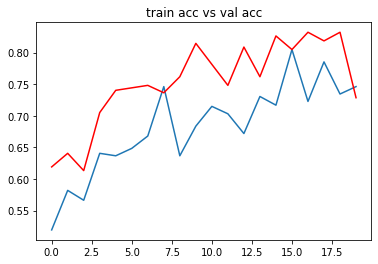

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')

plt.title('train acc vs val acc')
plt.show()

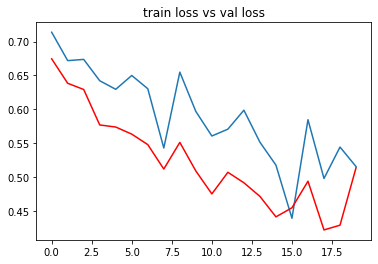

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')

plt.title('train loss vs val loss')
plt.show()

**Model Accuracy**

In [ ]:
# model accuracy
from keras.models import load_model

bestmodel_path='/content/bestmodel.h5'
model = load_model(bestmodel_path)

**Test_data on model**

In [ ]:
test_acc = model.evaluate_generator(test_data)[1]

print(f"the test accuracy of our model is {test_acc*100} %")

the test accuracy of our model is 77.46686339378357 %


# check our model on a image

Classes
**{'Brain Tumor': 0, 'Healthey',: 1}** 

In [ ]:
from keras.applications.mobilenet import preprocess_input

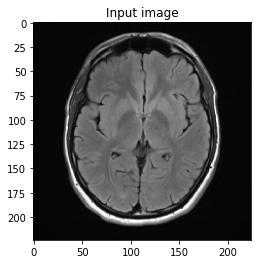

The MRI Scan image is not having a Tumor


In [ ]:
img_path = '/content/BrainTumorData/Brain Tumor Data Set/Healthey/Not Cancer  (1023).jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
pred = model.predict(img_preprocessed)

plt.imshow(img)
plt.title('Input image')
plt.show()

if pred==0:
    print("The MRI Scan image is having a Tumor")
else:
    print("The MRI Scan image is not having a Tumor")

[[0]]


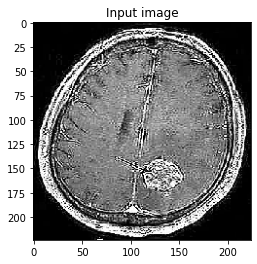

The MRI Scan image is having a Tumor


In [ ]:
img_path = '/content/BrainTumorData/Brain Tumor Data Set/Brain Tumor/Cancer (1463).jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
pred = model.predict_classes(img_preprocessed)

print(pred)
plt.imshow(img)
plt.title('Input image')
plt.show()

if pred==0:
    print("The MRI Scan image is having a Tumor")
else:
    print("The MRI Scan image is not having a Tumor")